In [1]:
# Previously Figure 5, now Figure 6
#Plot includes the mean AR freq to be overlayed on the original plot to highlight areas with higher AR activity
import numpy as np
import glob
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import warnings
import dask.array as da
import dask
import matplotlib as mpl
import xarray as xr
import numpy.ma as ma
from matplotlib.colorbar import ColorbarBase
from matplotlib.colors import LinearSegmentedColormap
from matplotlib.colors import ListedColormap, BoundaryNorm
import matplotlib.colors as mcolors
from matplotlib.cm import get_cmap
import cartopy.mpl.ticker as cticker
from matplotlib.colors import LinearSegmentedColormap
import matplotlib.patches as mpatches
import matplotlib.colors as mcolors
import cartopy.feature as cfeature
import cartopy.mpl.ticker as cticker
import matplotlib.patches as mpatches

In [11]:
# Reading the datasets with consistency scale values for each algorithm and IVT
#Can only be generated after running NCS1.py,NCS2.py
CB = np.load('/N/u/dkamnani/BigRed200/Paper Final/New additions/CBcsv.npy')
CN = np.load('/N/u/dkamnani/BigRed200/Paper Final/New additions/CNcsv.npy')
GW = np.load('/N/u/dkamnani/BigRed200/Paper Final/New additions/GWcsv.npy')
Reid = np.load('/N/u/dkamnani/BigRed200/Paper Final/New additions/RDcsv.npy')
MD = np.load('/N/u/dkamnani/BigRed200/Paper Final/New additions/MDcsv.npy')
IVT = np.load('/N/u/dkamnani/BigRed200/Paper Final/New additions/CBcsv.npy')
#Mean_AR=xr.open_dataset('/N/u/dkamnani/BigRed200/Paper Final/New additions/Mean_AR.nc').ar_binary_tag 
#AR_freq=Mean_AR.values
#normalized_AR_freq= (AR_freq/50)
#print(normalized_AR_freq.max())

In [12]:
#Mean AR Freq

# Load mean AR frequency datasets for each algorithm
file_names = [
    '/N/u/dkamnani/BigRed200/Paper Final/New additions/Mean_AR_CB.nc', '/N/u/dkamnani/BigRed200/Paper Final/New additions/Mean_AR_CN.nc', '/N/u/dkamnani/BigRed200/Paper Final/New additions/Mean_AR_GW.nc', 
    '/N/u/dkamnani/BigRed200/Paper Final/New additions/Mean_AR_RD.nc', '/N/u/dkamnani/BigRed200/Paper Final/New additions/Mean_AR_MD.nc'
]

mean_ar_frequencies = []

for file in file_names:
    dataset = xr.open_dataset(file)
    ar_freq=dataset.ar_binary_tag.values
    mean_ar_frequencies.append(ar_freq / ar_freq.max() )  # Normalizing

# Convert list to a NumPy array (shape: 6, height, width)
mean_ar_frequencies = np.stack(mean_ar_frequencies, axis=0)

Mean_AR_IVT=xr.open_dataset('/N/u/dkamnani/BigRed200/Paper Final/New additions/Mean_AR_IVT.nc').IVT
IVT_freq=Mean_AR_IVT.values
normalized_IVT_freq= (IVT_freq/IVT_freq.max())
print(normalized_IVT_freq.max())

# Stack IVT data on top of mean_ar_frequencies
mean_ar_frequencies = np.vstack([mean_ar_frequencies, np.expand_dims(normalized_IVT_freq, axis=0)])

# Print max value to check normalization
print(mean_ar_frequencies.shape)

1.0
(6, 361, 576)


In [13]:
#loading data
#Reading the consistent values for different algorithms
CBC=np.load('/N/u/dkamnani/BigRed200/Paper Final/Data/CBCangletest.npy')
CNC=np.load('CNCangle.npy')
MDC=np.load('MDCangle.npy')
RDC=np.load('RDCangle.npy')
GWC=np.load('GWCangle.npy')
IVTC=np.load('IVTCangle.npy')

In [14]:
#Reading the highly consistent values for different algorithms
CBHC=np.load('CBHCangle.npy')
CNHC=np.load('CNHCangle.npy')
MDHC=np.load('MDHCangle.npy')
RDHC=np.load('RDHCangle.npy')
GWHC=np.load('GWHCangle.npy')
IVTHC=np.load('IVTHCangle.npy')

In [15]:
import numpy as np

# Assuming lat and lon are 1D arrays corresponding to latitude and longitude coordinates
lat = np.load('lat.npy')  # Example, load your latitudes
lon = np.load('lon.npy')  # Example, load your longitudes

# Taiwan region: latitudes between 20 and 25, longitudes between 120 and 125
lat_start, lat_end = 20, 25
lon_start, lon_end = 120, 125

# Find the indices where the latitudes are within the specified range
lat_indices = np.where((lat >= lat_start) & (lat <= lat_end))[0]

# Find the indices where the longitudes are within the specified range
lon_indices = np.where((lon >= lon_start) & (lon <= lon_end))[0]

# Now use these indices to extract the data from the 2D arrays (RDC and CNC)
# Extract the corresponding data for Taiwan region
RDC_taiwan = RDC[lat_indices, :][:, lon_indices]
CNC_taiwan = CNC[lat_indices, :][:, lon_indices]

# You can now proceed with further analysis on Reid_taiwan and CNC_taiwan, 
# for example calculating the mean over time or performing other comparisons.


In [12]:
print(RDC_taiwan)

[[         nan          nan          nan          nan          nan
  192.09475708          nan          nan          nan]
 [         nan          nan          nan 188.13010235 188.13010235
           nan          nan          nan          nan]
 [         nan 184.08561678 186.34019175 186.34019175 182.1210964
  182.1210964  180.                  nan          nan]
 [171.86989765          nan 175.60129465 175.60129465 177.8789036
           nan 167.90524292          nan 169.50852299]
 [         nan          nan 171.86989765 173.65980825 164.35775354
  162.89727103 162.89727103 165.46554492 165.46554492]
 [147.52880771 161.56505118 144.46232221 161.56505118 151.38954033
  147.52880771 157.38013505 147.52880771 150.524111  ]
 [119.475889   128.65980825          nan 141.70983681 128.65980825
  135.         141.34019175 138.17983012 141.34019175]
 [116.56505118 119.475889            nan 116.56505118 119.475889
  131.82016988 128.65980825 131.82016988 131.82016988]
 [111.03751103 108.43494882 

In [16]:
#Removing nan values
IVTHC = np.ma.masked_invalid(IVTHC)
IVTC=np.ma.masked_invalid(IVTC)
CBHC = np.ma.masked_invalid(CBHC)
CBC=np.ma.masked_invalid(CBC)
CNHC = np.ma.masked_invalid(CNHC)
CNC=np.ma.masked_invalid(CNC)
RDHC = np.ma.masked_invalid(RDHC)
RDC=np.ma.masked_invalid(RDC)
MDHC=np.ma.masked_invalid(MDHC)
MDC=np.ma.masked_invalid(MDC)
GWHC = np.ma.masked_invalid(GWHC)
GWC=np.ma.masked_invalid(GWC)

In [17]:
#Reading the lat and lon values
lat=np.load('lat.npy')
lon=np.load('lon.npy')


In [18]:

#Defining a function to assign a season based on angle
def assign_numbers(angles):
    assigned_numbers = np.zeros_like(angles)
    assigned_numbers[(angles >= 0) & (angles <= 45) | (angles > 315) & (angles <= 360)] = 0
    assigned_numbers[(angles > 45) & (angles <= 135)] = 1
    assigned_numbers[(angles > 135) & (angles <= 225)] = 2
    assigned_numbers[(angles > 225) & (angles <= 315)] = 3
    return assigned_numbers

IVTHC = assign_numbers(IVTHC)
IVTC = assign_numbers(IVTC)
CBHC = assign_numbers(CBHC)
CBC=assign_numbers(CBC)
CNHC = assign_numbers(CNHC)
CNC=assign_numbers(CNC)
RDHC = assign_numbers(RDHC)
RDC=assign_numbers(RDC)
MDHC=assign_numbers(MDHC)
MDC=assign_numbers(MDC)
GWHC = assign_numbers(GWHC)
GWC=assign_numbers(GWC)

(array([   0,    1,    2, ..., 1430, 1431, 1432]),)


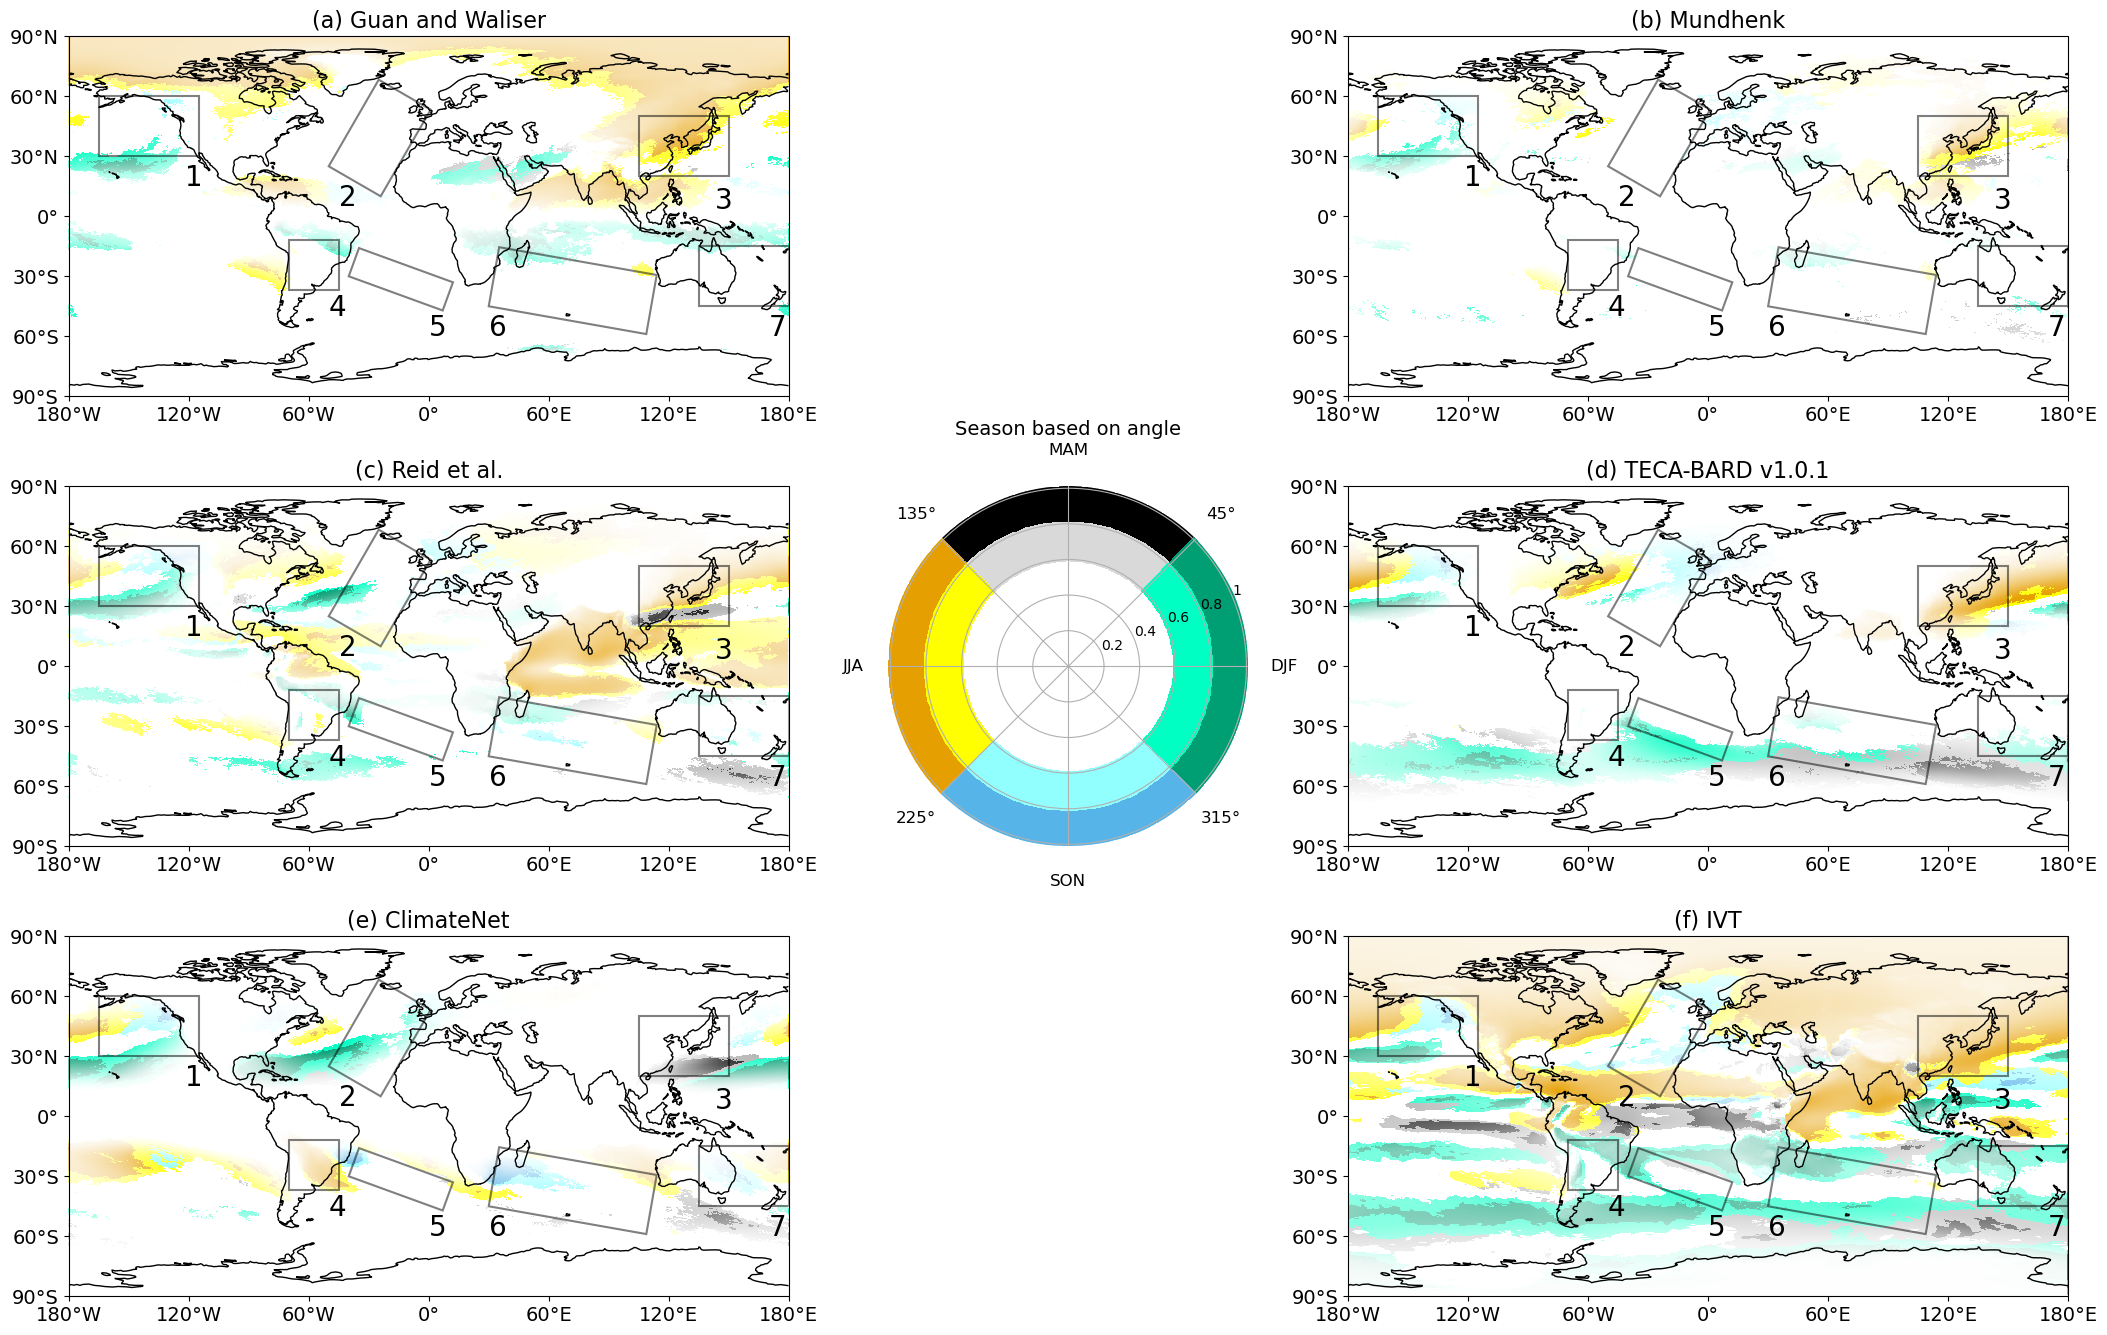

In [19]:
colors = [(0, 158/255, 115/255),(0, 0, 0), (230/255, 159/255, 0), (86/255, 180/255, 233/255)]
cmapplot=mcolors.ListedColormap(colors)
colors= [(0, 158/255, 115/255),(0.4, 0.4, 0.4), (230/255, 159/255, 0), (86/255, 180/255, 233/255)]
def lighten_color(color, factor=1.7):
    """
    Lightens the given color by multiplying each RGB channel by the given factor.
    """
    return tuple(min(channel * factor, 1.0) for channel in color)

# Lighter colors
lighter_colors = [lighten_color(color) for color in colors]
cmapplot2= mcolors.ListedColormap(lighter_colors)

# Create a new figure
fig = plt.figure(figsize=(21, 14))
projection = ccrs.PlateCarree()

# Define GeoAxes
ax1 = fig.add_subplot(3, 3, 1, projection=projection)
ax2 = fig.add_subplot(3, 3, 3, projection=projection)
ax3 = fig.add_subplot(3, 3, 4, projection=projection)
ax4 = fig.add_subplot(3, 3, 6, projection=projection)
ax5 = fig.add_subplot(3, 3, 7, projection=projection)
ax6 = fig.add_subplot(3, 3, 9, projection=projection)
axcb= fig.add_subplot(3, 3, 5, projection='polar',position=[-5.0, 0.4, 0.5, 0.2])

# Plot GW
ax1.pcolormesh(lon, lat, GWHC, cmap=cmapplot, transform=projection).set_alpha(mean_ar_frequencies[2])
ax1.pcolormesh(lon, lat, GWC, cmap=cmapplot2, transform=projection).set_alpha(mean_ar_frequencies[2])
ax1.set_title('(a) Guan and Waliser',fontsize=16)
#ax1.set_xlabel('Longitude')
#ax1.set_ylabel('Latitude')
ax1.coastlines()

# Plot MD
ax2.pcolormesh(lon, lat, MDHC, cmap=cmapplot, transform=projection).set_alpha(mean_ar_frequencies[4])
ax2.pcolormesh(lon, lat, MDC, cmap=cmapplot2, transform=projection).set_alpha(mean_ar_frequencies[4])
ax2.set_title('(b) Mundhenk',fontsize=16)
#ax2.set_xlabel('Longitude')
#ax2.set_ylabel('Latitude')
ax2.coastlines()

# Plot RD
ax3.pcolormesh(lon, lat, RDHC, cmap=cmapplot, transform=projection).set_alpha(mean_ar_frequencies[3])
ax3.pcolormesh(lon, lat, RDC, cmap=cmapplot2, transform=projection).set_alpha(mean_ar_frequencies[3])
ax3.set_title('(c) Reid et al.',fontsize=16)
#ax3.set_xlabel('Longitude')
#ax3.set_ylabel('Latitude')
ax3.coastlines()

# Plot CB
ax4.pcolormesh(lon, lat, CBHC, cmap=cmapplot, transform=projection).set_alpha(mean_ar_frequencies[0])
ax4.pcolormesh(lon, lat, CBC, cmap=cmapplot2, transform=projection).set_alpha(mean_ar_frequencies[0])
ax4.set_title('(d) TECA-BARD v1.0.1',fontsize=16)
#ax4.set_xlabel('Longitude')
#ax4.set_ylabel('Latitude')
ax4.coastlines()

# Plot CN
ax5.pcolormesh(lon, lat, CNHC, cmap=cmapplot, transform=projection).set_alpha(mean_ar_frequencies[1])
ax5.pcolormesh(lon, lat, CNC, cmap=cmapplot2, transform=projection).set_alpha(mean_ar_frequencies[1])
ax5.set_title('(e) ClimateNet',fontsize=16)
#ax5.set_xlabel('Longitude')
#ax5.set_ylabel('Latitude')
ax5.coastlines()

# Plot IVT
ax6.pcolormesh(lon, lat, IVTHC, cmap=cmapplot, transform=projection).set_alpha(mean_ar_frequencies[5])
ax6.pcolormesh(lon, lat, IVTC, cmap=cmapplot2, transform=projection).set_alpha(mean_ar_frequencies[5])
ax6.set_title('(f) IVT',fontsize=16)
#ax6.set_xlabel('Longitude')
#ax6.set_ylabel('Latitude')
ax6.coastlines()

#Plot the Polar color wheel
# Color map for the theta values(0.8-1)
# Colorblind-friendly colors
colors = [(0, 0, 0), (230/255, 159/255, 0), (86/255, 180/255, 233/255), (0, 158/255, 115/255)]
n_bins = [45,135, 225, 315,405]  # Angle bins
cmap_name = "polar_color_wheel"
cmap = mpl.colors.LinearSegmentedColormap.from_list(cmap_name, colors, N=len(n_bins) - 1)

#Color map for THE THETA VALUES (0.6-0.8)
# Colorblind-friendly colors
colors = [(0.5, 0.5, 0.5), (230/255, 159/255, 0), (86/255, 180/255, 233/255), (0, 158/255, 115/255)]

# Factor to make colors lighter (you can adjust this as needed)
lightening_factor =1.7  # Multiply by 0.75 to make them lighter

# Create lighter colors by multiplying each component by the factor
lighter_colors = [(r * lightening_factor, g * lightening_factor, b * lightening_factor) for r, g, b in colors]

n_bins = [45, 135, 225, 315, 405]  # Angle bins
cmap_name2 = "polar_color_wheel"
cmap2 = mpl.colors.LinearSegmentedColormap.from_list(cmap_name2, lighter_colors, N=len(n_bins) - 1)
# Define colormap normalization for 0 to 2*pi
norm = mpl.colors.Normalize(45*np.pi/180, 405*np.pi/180) 
# Plot a color mesh on the polar plot with the color set by the angle
n = 200 #the number of secants for the mesh
t = np.linspace(45*np.pi/180, 405*np.pi/180, n)   #theta values
r1 = np.linspace(.8, 1, 10)        #radius values change 0.6 to 0 for full circle
r2=np.linspace(.6,.8,10)
rg, tg = np.meshgrid(r1, t)      #create an r, theta meshgrid
rg2,tg2=np.meshgrid(r2,t)
c1 = tg                   #define color values as theta value
c2=tg2
im=axcb.pcolormesh(t, r1,c1.T, norm=norm, cmap=cmap)  #plot the colormesh on axis with colormap
im=axcb.pcolormesh(t, r2, c2.T, norm=norm, cmap=cmap2)  #plot the colormesh on axis with colormap
axcb.set_yticklabels([])                   #turn off radial tick labels (yticks)
axcb.tick_params(pad=15, labelsize=26)      #cosmetic changes to tick labels
axcb.spines['polar'].set_visible(False)  
axcb.set_title('Season based on angle', fontsize=14)
custom_ticks = [0, np.pi/4, np.pi / 2, (135/180)*np.pi , np.pi, (225/180)*np.pi, (3/2)*np.pi,(315/180)*np.pi]
custom_tick_labels = ['DJF', '45°', 'MAM','135°', 'JJA', '225°', 'SON','315°']
axcb.set_xticks(custom_ticks)
axcb.set_xticklabels(custom_tick_labels,fontsize=12)

#radial_ticks = [.4, .8]
radial_ticks=[0.2,0.4,0.6,0.8,1]  # You can adjust these values as needed
axcb.set_yticks(radial_ticks)
#radial_ticks_labels = ['0.6-0.8', '0.8-1']  # You can adjust these values as needed
radial_ticks_labels = ['0.2','0.4','0.6','0.8','1']
axcb.set_yticklabels(radial_ticks_labels, fontsize=10)

# Plot each subplot
for ax in [ax1, ax2, ax3, ax4, ax5, ax6]:  
    ax.set_xticks(np.arange(-180, 181, 60), crs=ccrs.PlateCarree())
    ax.set_yticks(np.arange(-90, 91, 30), crs=ccrs.PlateCarree())
    ax.set_xticklabels(['180°W', '120°W', '60°W', '0°', '60°E', '120°E', '180°E'])  # Longitude labels
    ax.set_yticklabels(['90°S', '60°S', '30°S', '0°', '30°N', '60°N', '90°N'])  # Latitude labels
    ax.tick_params(axis='x', labelsize=14) 
    ax.tick_params(axis='y', labelsize=14) 

    # Adding patches
    ax.add_patch(mpatches.Rectangle(xy=[-165, 30], width=50, height=30,
                                    alpha=0.5,
                                    lw=1.5,
                                    facecolor='None',
                                    edgecolor='black',
                                    transform=ccrs.PlateCarree()))
    ax.annotate("1", (-122, 15), color='black', fontsize=20)

    ax.add_patch(mpatches.Rectangle(xy=[-50, 25], width=30, height=50,
                                    alpha=0.5,
                                    lw=1.5,
                                    facecolor='None',
                                    edgecolor='black',
                                    angle=-30,
                                    transform=ccrs.PlateCarree()))
    ax.annotate("2", (-45, 5), color='black', fontsize=20)

    ax.add_patch(mpatches.Rectangle(xy=[105, 20], width=45, height=30,
                                    alpha=0.5,
                                    lw=1.5,  
                                    facecolor='None',
                                    edgecolor='black',  
                                    angle=0,  
                                    transform=ccrs.PlateCarree()))
    ax.annotate("3", (143, 3.5), color='black', fontsize=20)

    ax.add_patch(mpatches.Rectangle(xy=[-70, -37], width=25, height=25,
                                    alpha=0.5,
                                    lw=1.5,
                                    facecolor='None',
                                    edgecolor='black',
                                    transform=ccrs.PlateCarree()))
    ax.annotate("4", (-50, -50), color='black', fontsize=20)

    ax.add_patch(mpatches.Rectangle(xy=[30, -45], width=80, height=30,
                                    alpha=0.5,
                                    lw=1.5,
                                    facecolor='None',
                                    edgecolor='black',
                                    angle=-10,
                                    transform=ccrs.PlateCarree()))
    ax.annotate("6", (30, -60), color='black', fontsize=20)

    ax.add_patch(mpatches.Rectangle(xy=[-40, -30], width=50, height=15,
                                    alpha=0.5,
                                    lw=1.5,
                                    angle=-20,
                                    facecolor='None',
                                    edgecolor='black',
                                    transform=ccrs.PlateCarree()))
    ax.annotate("5", (0, -60), color='black', fontsize=20)

    ax.add_patch(mpatches.Rectangle(xy=[135, -45], width=45, height=30,
                                    alpha=0.5,
                                    lw=1.5,  
                                    angle=0,  
                                    facecolor='None',
                                    edgecolor='black',  
                                    transform=ccrs.PlateCarree()))
    ax.annotate("7", (170, -60), color='black', fontsize=20)


fig.subplots_adjust(bottom=0.05, top=0.95, left=0.01, right=1,
                    wspace=-0.2, hspace=0.25)
#plt.tight_layout()
plt.savefig("Figure5.png", dpi=300, bbox_inches='tight', pad_inches=0.1)
plt.show()